# Monte carlo simulations for FYS4711 by Vibishan Raveendrarajah

## Introduction
In this report we will look at python simulations for photons using the Monte Carlo method. The point of this excercise is to make simulations that will help us understand how photons of different energies interact and propagate through a medium. In this project specifically we look at the interactions of photons with the energy of 200 KeV and 2 MeV in water. We first plot the attenuation coefficient to see how varying energies of photons will affect its attenuation. Then we will plot the cumalative and probability distrubutions of each energy to see how far the photons will penetrate the medium compared to eachother. We will then sample photon steplengths using the inverse transform and compare this to the analytical solution. We then go on to plot a normalised differential scattering cross section as a function of the angle of incident. We will then plot Compton scattering angles using the rejection technique and finally we will atempt to visualise the trajectory of a hundred photons of the two different energies using the previous calculations.

###### First we will import our python libraries that we will use as well as the specified parameters given from the task

In [1]:
import numpy as np 
from numpy import pi, log, exp, cos, sin, arccos, arcsin
import matplotlib.pyplot as plt

min, max = 50, 2000      #min and max photon energy in kev
nv = 3.43e23             #number of electrons in water per cubic centimeter 

### Task 1
In this task I created an attenuation coefficient function. I did this by implementing the electronic cross section for Compton
scattering using eq. 7.15 from the Attix book.

Using the cross section, i could multiply this value with electron per volume unit in water 'Uv'
I then made a seperate function that would print the plot.
I then calculated the values of 'mu' for 200 KeV and 2 MeV photons. By comparing this to published values of 0.137 cm-1 and 0.049 cm-1, i found out my numerical calculations had a difference of 1.7% and 2.4%, respectively. From visualising the results we saw that the attneuation coefficient decreases exponentialy then tapers off as the energy of the photon increases. The smaller the attenuation coefficient, the smaller the medium 'attenuates' our energy.

In [2]:

def atten_coef(hv):        #takes in photon energy hv as input,calculates K-N cross section per electron (ATTIX 7.15)

    #using constants and calculating alpha from given energy
    radius = 2.818e-13
    m0c = 0.511 #MeV
    alpha = hv/m0c 
    
    #electronic cross section for Compton scattering
    sigma  = 2*pi*(
        radius**2 * ( ((1+alpha)/(alpha**2)) * (2*(1+alpha)/(1+2*alpha) 
        - log(1+2*alpha)/alpha)
        + log(1+2*alpha)/(alpha*2) 
        - (1+3*alpha)/((1+2*alpha)**2))
        )

    #calculating attenuation coefficient
    mu = sigma * nv

    return mu #returns attenuation coefficient

###### For the next part we will print the specified values that task 1 asks us

In [3]:
pub_200, pub2 = 0.137, 0.049  #published values
low_en, high_en = atten_coef(0.2), atten_coef(2)
low_per, high_per = 100*((atten_coef(0.2)-pub_200)/atten_coef(0.2)), 100*((atten_coef(2)-pub2)/atten_coef(2))

#printing specified values and comparing with published values
print(f"The attenuation coefficient for 200KeV is:              {low_en:.3f} cm-1")
print(f'percent difference from published value for 200KeV:     {low_per:.1f}%')

print(f'The attenuation coefficient for 2MeV is:                {high_en:.3f} cm-1')
print(f'percent difference from published value for 2MeV:       {high_per:.1f}%')


The attenuation coefficient for 200KeV is:              0.139 cm-1
percent difference from published value for 200KeV:     1.7%
The attenuation coefficient for 2MeV is:                0.050 cm-1
percent difference from published value for 2MeV:       2.4%


###### Nextly we will visualise task 1

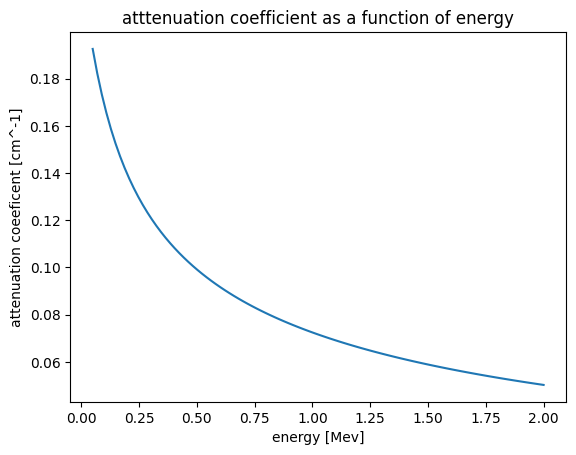

In [4]:
def plot_task1():
    energy = np.linspace(min/1000, max/1000, 100)

    plt.title('atttenuation coefficient as a function of energy')
    plt.ylabel('attenuation coeeficent [cm^-1]')
    plt.xlabel('energy [Mev]')

    plt.plot(energy, atten_coef(energy))
    plt.show()

plot_task1()

### task 2
for task 2 I calculated the probability and cumalative distributions. 
the function CD is used for simulating the depth of interaction. I used the attenuation coefficient calculated from task 1. We see a significant difference in the cumalative distrubution between the two energies but no large difference in the probability difference.

In [5]:
x = np.linspace(0, 50, 100)

def PD(hv, x):               #Probability Distrubution, takes in energy as argument
    mu = atten_coef(hv)      #uses function from task1
    pd = mu * exp(mu*(-x))   #probability distubutuion formula
    return pd


def CD(hv, x):               #Cumalative Distrubution, takes in energy as argument
    mu = atten_coef(hv)      #uses function from task1
    cd = 1 - exp(mu*(-x))    #cumalative distrubution formula
    return cd

###### The next function plots the probability and cumalative distrubution using the functions above

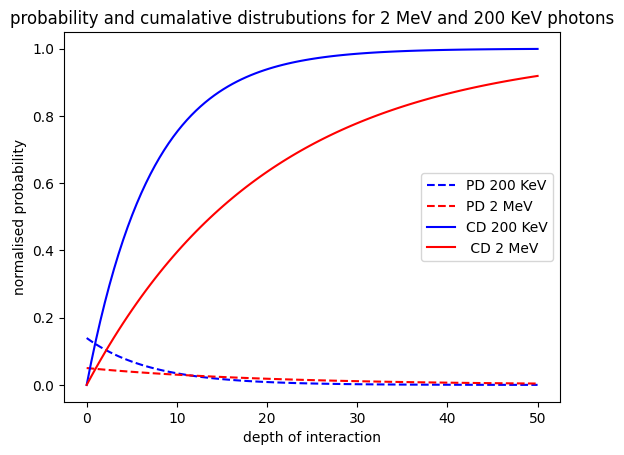

In [6]:
def plot_task2():
    plt.title('probability and cumalative distrubutions for 2 MeV and 200 KeV photons')
    plt.plot(x, PD(0.2, x), 'b--')
    plt.plot(x, PD(2, x),'r--') 
    #plt.legend(['PD 200 KeV', 'PD 2 MeV'])
    #plt.show()
    plt.ylabel('normalised probability')
    plt.xlabel('depth of interaction')
    #plt.title('cumalative distrubution')
    plt.plot(x, CD(0.2, x),'b-')
    plt.plot(x, CD(2, x), 'r-')
    #plt.legend(['CD 200 KeV', ' CD 2 MeV'])

    plt.legend(['PD 200 KeV', 'PD 2 MeV', 'CD 200 KeV', ' CD 2 MeV'])
    
    plt.show()

plot_task2()

### task 3
In this task I sampled photon steplengths using the inverse transform. To sample the photon steplengthe I used the formula  $$ x = \frac{-log(1-u)}{\mu}   $$ from the montecarlo presentation. I then run a for loop 1000times to represent 1000 different photons. The simulated pohotons path lengths are represented in the histogram. We see that the histogram distrubution corresponds to the probability distrubution. The 2MeV photons cumalative distrubution curve looks very similar to the its histogram as the histogram has a distrubution range of 30 if you look at the x-axis compared to the 2KeV that has a histrogram distrubution stretching out to as much as 90. this can be seen with the flatter curve in the probability distrubution curve of the 2 MeV's flatter distrubution.

In [7]:
def paths(hv):                                      #runs path siumulation for 1000 photons for given photon energy
    mu = atten_coef(hv)                             #either 2MeV or 200KeV
    tot_phot = 1000
    path_list = np.zeros(tot_phot)
    for i in range(tot_phot):
        path_list[i] = -log(1-np.random.randint(0, 100)/100)/mu  #using formula x = -log(1-u)

    mean = np.mean(path_list)                           #mean value of sampled events

    #the randit method fins a number between 0 and 100, it is then converted into a decimal between 0 and 1
    #print(f'the mean path value for {hv}KeV is {mean:.1f}')

    return path_list

l2 = paths(2) 
print(f'the mean path value for 2 MeV is {np.mean(l2):.1f}')
l200 = paths(0.2)  
print(f'the mean path value for 2 MeV is {np.mean(l200):.1f}')


the mean path value for 2 MeV is 20.0
the mean path value for 2 MeV is 7.0


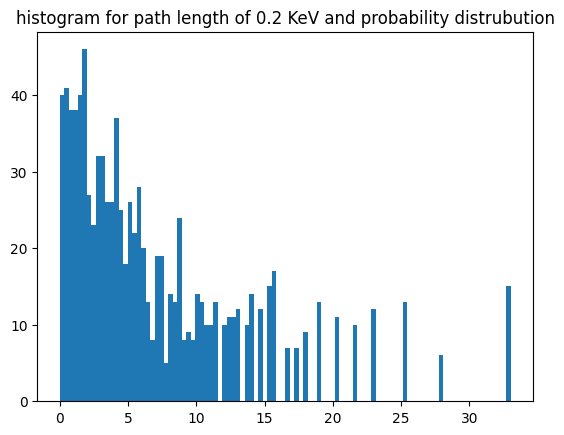

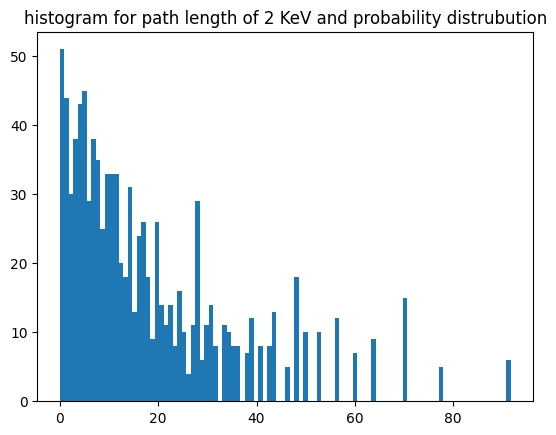

In [8]:
def plot_task3(hv):  #function to plot histogram 
    x = paths(hv)

    plt.title(f'histogram for path length of {hv} KeV and probability distrubution')
    plt.hist(x, bins = 100)
    
    plt.show()


plot_task3(0.2)
plot_task3(2)

### task 4 
In this task I used Comptons formula:
$$ hv' =  \frac{hv}{ (1+\frac{hv}{mc^2})*(1-cos(\phi)} $$
to calculate the scattered photons energy, this scattered energy is then used to calculate the cross section using the formula:

$$ cross section = \frac{radius^2}{2}  \frac{hv'}{hv}^2  (\frac{hv'}{hv} + \frac{hv}{hv'} - sin(\phi)^2) $$


In [9]:
def scatter(incomming_angle_deg, incomming_energy):
    hv = incomming_energy                             #energy in Mev
    mc2 = 0.511                                       #electron volt mass (Mev)
    phi = np.deg2rad(incomming_angle_deg)             #radians of incomming angle
    c = 3e8                                           #m/s

    new_hv = hv/(1+(hv/mc2)*(1-cos(phi)))
    return new_hv

def diff_scatt(theta, hv):          #energy in MeV, incident angle theta
    mc2 = 0.511                                       #electron volt mass (Mev)
    radius = 2.82*1e-13                               #electron radius in cm
    phi = np.deg2rad(theta)                           #radians of incomming angle
    c = 3e8                                           #m/s

    new_hv = hv/(1+(hv/mc2)*(1-cos(phi)))             #calculating scattered photon energy

    #calculating equation from slide 39, compton cross section
    f1 = (new_hv/hv)**2
    f2 = ((new_hv/hv) + (hv/new_hv) - (sin(phi))**2)
    crosso = (radius**2/2) * f1 * f2                   #with respect to omega

    return new_hv, crosso

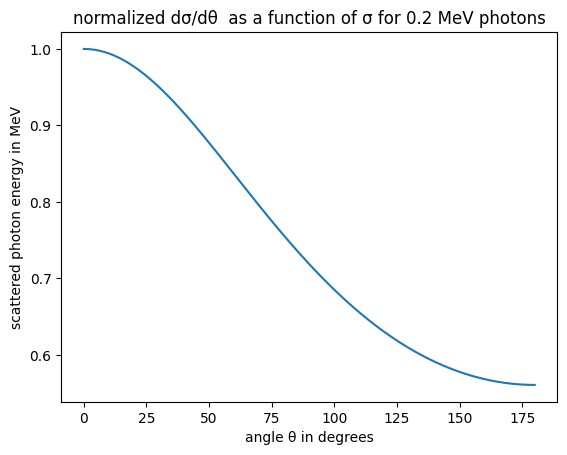

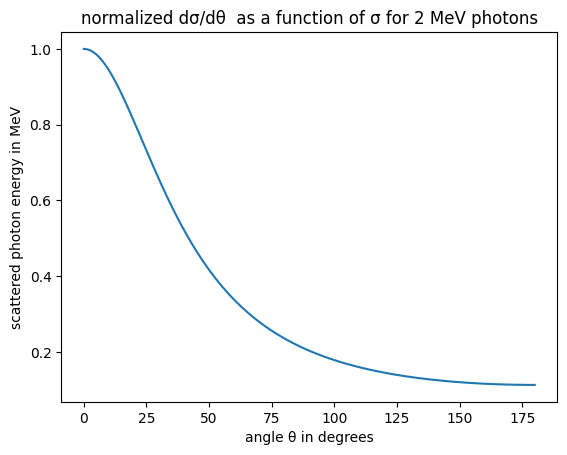

In [10]:
def plot_task4(theta, energy):
    scatter_hv, compton = diff_scatt(theta, energy)

    plt.title(f'normalized d\u03C3/d\u03B8  as a function of \u03C3 for {energy} MeV photons')
    plt.plot(theta, scatter_hv/energy)
    plt.xlabel('angle \u03B8 in degrees')
    plt.ylabel('scattered photon energy in MeV')
    plt.show()

theta = np.linspace(0,180,181)

plot_task4(theta, 0.2)
plot_task4(theta, 2)

### task 5

In this task I sampled Compton scattering angles using the rejection technique. I used the rejection technique to
sample scattering angles for 200 keV and 2 MeV photons 1000 times and plotted the histogram distrubution. The plot consists of the histogram from the simulation compared with the scattered photon energy as a function of angle curve. We can see that our 1000-photon simulation corresponds to the cross section curve, however the distrubution for the 200 KeV photon does not seem to correspond, this can be due to a error in the coding, formula or plotting method.

In [11]:
def rej_tec(theta, hv):                               #Rejection Technique for compton scattering

    n = 1000                                          #number of simulation
    new_hv, cross_sec = diff_scatt(theta, hv)         #getting curve value that will be used to determine rejection

    norm_hv = np.around(new_hv/hv, decimals=2)        #normalising energy and rounding to two decimal places
    
    cs_max = np.max(cross_sec)                        #value that will be used to de-normalise for simulated values
    
    np.around(cross_sec/cs_max, decimals=2)
    sim_angle, sim_cross = [], []                     #creating emty array to be filled


    for i in range(n*2):
        rand_angle = np.random.randint(0, 180)        #normalised random angle chosen between 0 and 180 degrees
        rand_norm =  np.random.randint(0,100)/100     #getting random normalise number between 0.00 and 1.00
        
        j = np.where(theta == rand_angle)            #getting index of list from the random angle

        if rand_norm <= norm_hv[j]:               #here we check if the random-normalised energy is below or equal to calculated energy
            sim_angle.append(rand_angle)

            sim_cross.append(rand_norm*cs_max)

    return sim_angle, sim_cross

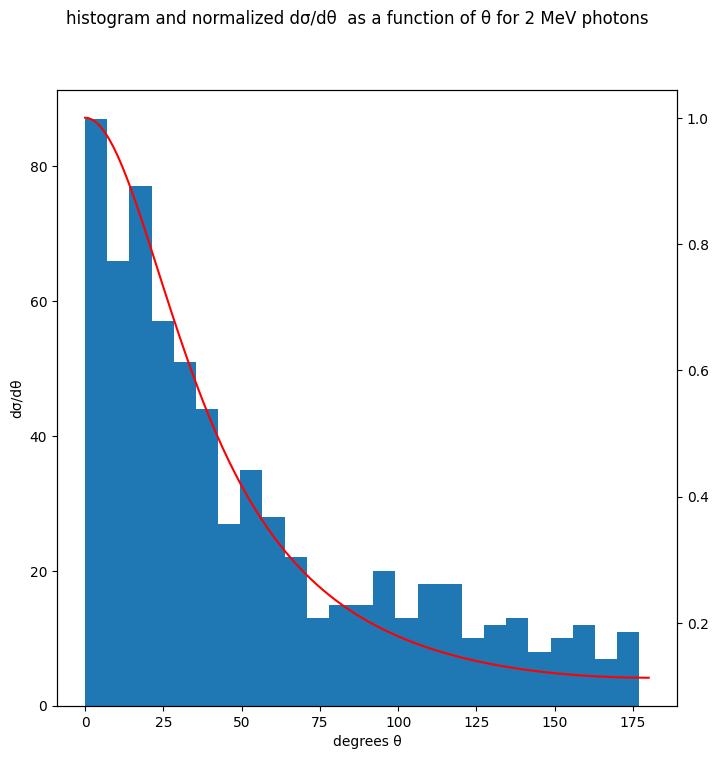

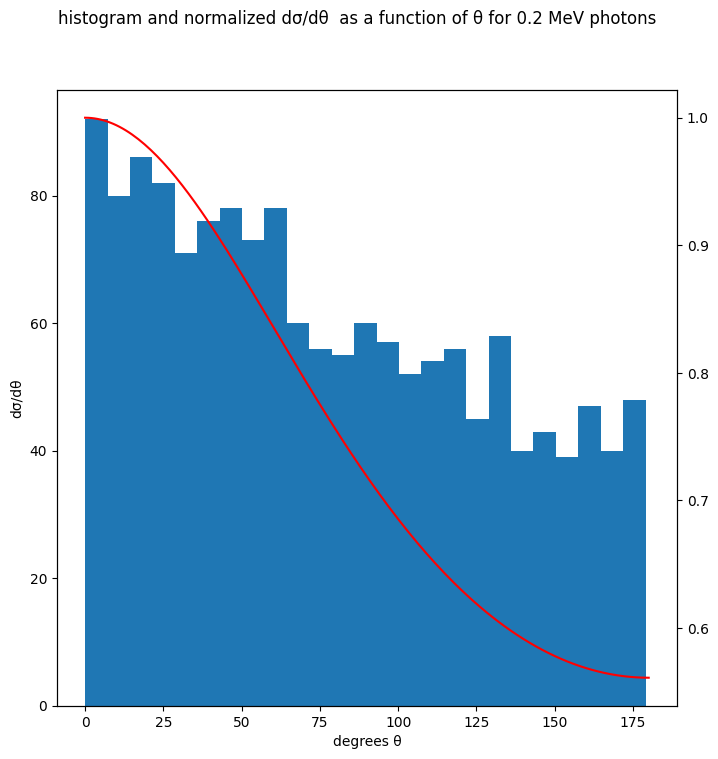

In [12]:
def plot_task5(theta, hv):
    angle, dsdt = rej_tec(theta, hv)
    scatter_hv, compton = diff_scatt(theta, hv)

    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.hist(angle, bins = 25)    
    ax2.plot(theta, scatter_hv/hv, 'r')

    ax1.set_xlabel("degrees \u03B8")
    ax1.set_ylabel("d\u03C3/d\u03B8")


    fig.suptitle(f'histogram and normalized d\u03C3/d\u03B8  as a function of \u03B8 for {hv} MeV photons')
    #fig.show()
    plt.show()
    
plot_task5(theta, 2)
plot_task5(theta, 0.2)

### task 6
In the final task i attempted to plot a trajectory simulation, this did not work as expected and I didnt get the desired output. The y-postion has calculation errors that I could not see, so I plotted the z position as a function of the x position.
From the 1000 simulations of 2KeV photons we see that the photons travel a greater distance before loosing its energy below 50 MeV. The graph uses angle of the random-scattering to be between 0 and 100 degrees, this could effect how our graph appears.

The code consists of empty lists for the position of the photon in three dimensions. to find the vallue of $\theta_{n+1}$ i used the invers cosine, also known as arccos to get the angle. I used a similar approach to find $\phi_{n+1}$ by re arranging the formula from the montecarlo presentation from slides 44.

To calculate the positions I used the formulas found from slide 45.

In [26]:
def trajectory(hv):

    n = 1000                                            #step length
    theta = 0                                           #initial incomming angle
    xpos, ypos, zpos = [0], [0], [0]                    #initialise our position arrays
    theta_n, phi_n = 0, 0
    Z = []                                              #our mean depth z

    energy = hv
    i = 0
    while energy >= 0.05:

        theta_s, phi_s = np.deg2rad(np.random.randint(0,100)), np.deg2rad(np.random.randint(0,100))
    
        delta_s = np.mean(paths(energy))

        Z.append(delta_s)

        #first we solve for theta_(n+1)
        cos_t = sin(theta_s) * cos(phi_s) * sin(theta_n) + cos(theta_s) * cos(theta_n) 

        #theta_n.append(arccos(cos_t))
        theta_n1 = arccos(cos_t)

        #nextly we solve for phi_(n+1)
        #phi_n.append(arcsin(-sin(theta_s)*sin(phi_s)/sin(theta_n[i])) + phi_n[i])
        phi_n1 = arcsin(-sin(theta_s)*sin(phi_s)/sin(theta_n)) + phi_n

        xpos.append(xpos[i] + delta_s * sin(theta_n1) * cos_t)
        ypos.append(ypos[i] + delta_s * sin(theta_n1) * sin(phi_n1))
        zpos.append(zpos[i] + delta_s * cos_t)

        #update values for next loop
        #hv = new_hv                                                     #update our energy for next loop
        phi_n, theta_n = phi_n1, theta_n1

        i += 1
        energy = scatter(np.rad2deg(theta_n), energy)

    return xpos, ypos, zpos

C:\Users\Vibis\AppData\Local\Temp\ipykernel_15452\44193653.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  phi_n1 = arcsin(-sin(theta_s)*sin(phi_s)/sin(theta_n)) + phi_n
C:\Users\Vibis\AppData\Local\Temp\ipykernel_15452\44193653.py:28: RuntimeWarning: invalid value encountered in arcsin
  phi_n1 = arcsin(-sin(theta_s)*sin(phi_s)/sin(theta_n)) + phi_n
C:\Users\Vibis\AppData\Local\Temp\ipykernel_15452\44193653.py:28: RuntimeWarning: invalid value encountered in double_scalars
  phi_n1 = arcsin(-sin(theta_s)*sin(phi_s)/sin(theta_n)) + phi_n


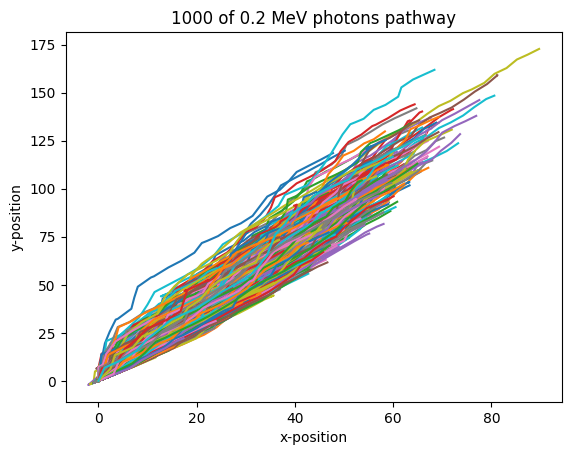

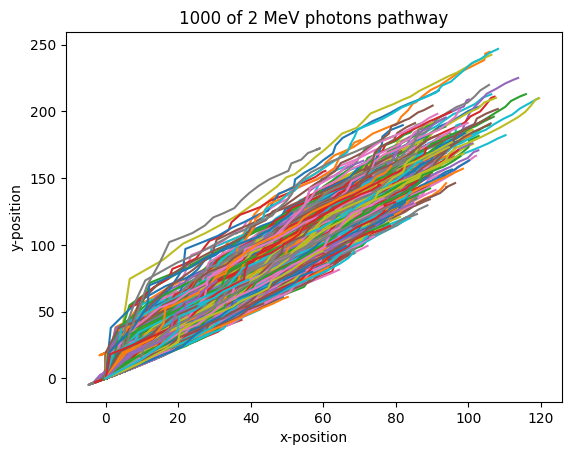

In [27]:
def plot_task6(hv, simulations):

    plt.title(f'{simulations} of {hv} MeV photons pathway')

    for i in range(simulations):                            #we loop through the specified amount f simulations
        x, y, z = trajectory(hv)                            #plot trajectory of each simulation
        plt.plot(x,z)

    plt.xlabel('x-position')
    plt.ylabel('y-position')

    plt.show()

plot_task6(0.2, 1000)
plot_task6(2, 1000)